In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno

import dash
import plotly.express as px
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import MissingIndicator
import statsmodels.api as sm
from statsmodels.formula.api import ols
import functions
# stops python from showing scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

In [67]:
og_df = pd.read_csv('/Users/stephen/Flatiron/Phase2/Project2/Data/combined_clean_data.csv', index_col=0)
og_df.columns

Index(['id', 'price_x', 'grade_x', 'date_x', 'yr_built_x', 'yr_renovated_x',
       'floors_1.5', 'floors_2.0', 'floors_2.5', 'floors_3.0', 'floors_3.5',
       'renovated', 'price_y', 'view_x', 'sqft_living', 'sqft_lot', 'bedrooms',
       'bathrooms', 'price', 'date_y', 'yr_renovated_y', 'yr_built_y',
       'condition', 'grade_y', 'view_y', 'waterfront', 'zipcode', 'lat',
       'long', 'cat_waterfront', 'cat_view', 'cat_condition', 'cat_grade',
       'cat_zipcode'],
      dtype='object')

In [68]:
df = og_df[['id', 'price', 'date_x', 'yr_renovated_x', 'yr_built_x', 'condition', 'grade_x', 'view_x', 'waterfront', 'zipcode', 'lat', 'long']]

In [69]:
df.shape

(18183, 12)

<AxesSubplot:>

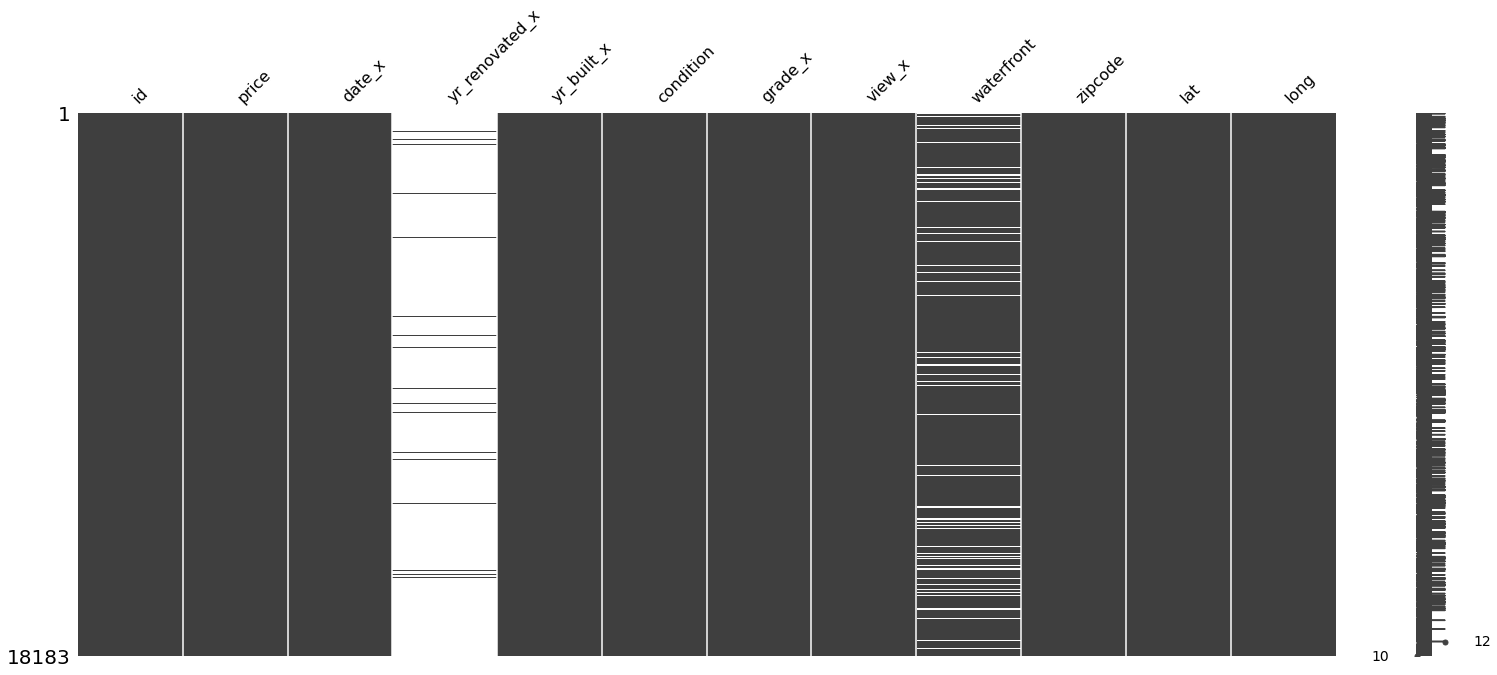

In [70]:
msno.matrix(df)

<AxesSubplot:>

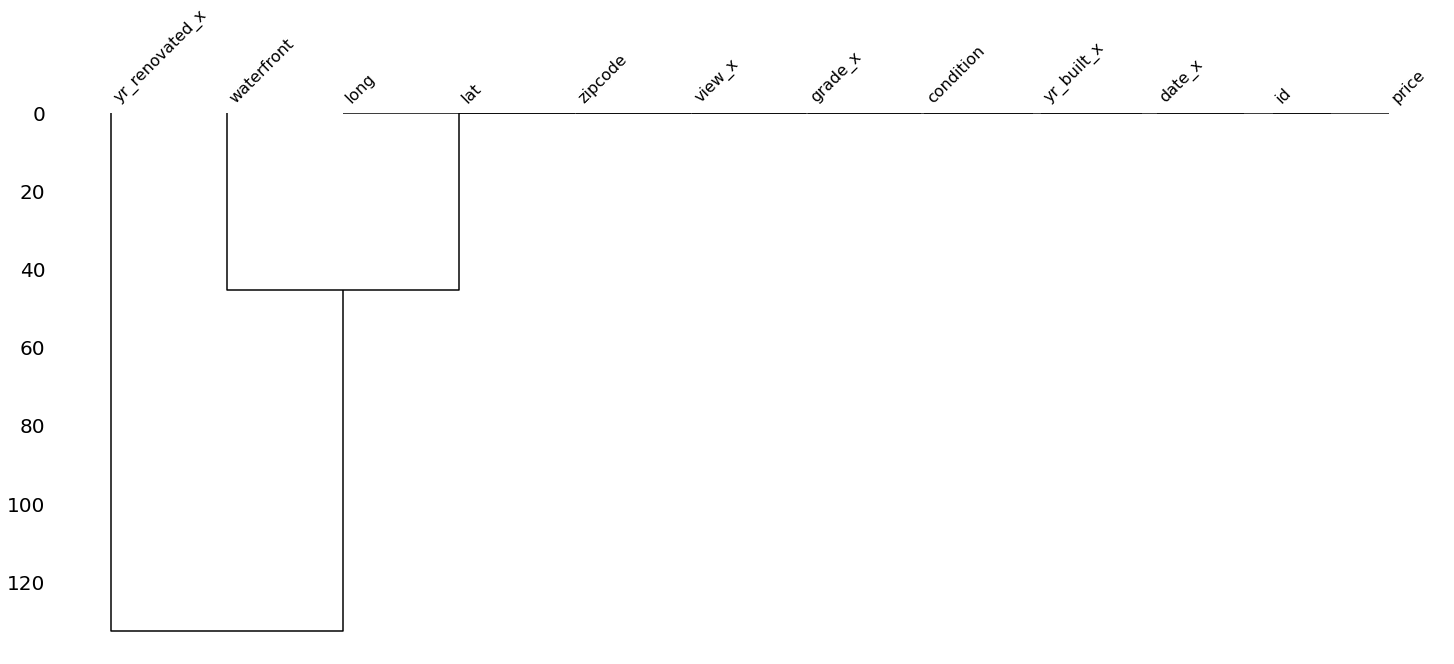

In [71]:
msno.dendrogram(df)

In [72]:
df.isna().sum()

id                    0
price                 0
date_x                0
yr_renovated_x    17731
yr_built_x            0
condition             0
grade_x               0
view_x                0
waterfront         2036
zipcode               0
lat                   0
long                  0
dtype: int64

In [73]:
#df.dropna(inplace=True)

In [85]:
X = df[['zipcode', 'condition', 'grade_x', 'yr_renovated_x', 'yr_built_x']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(f"X_train is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

X_train is a DataFrame with 13637 rows and 5 columns
y_train is a Series with 13637 values


In [92]:
X_train["yr_renovated_x"] = X_train["yr_renovated_x"].fillna("N/A")
X_train["yr_renovated_x"]



from sklearn.impute import MissingIndicator

# (1) Identify data to be transformed
# We only want missing indicators for LotFrontage
reno_train = X_train[["yr_renovated_x"]]


missing_indicator = MissingIndicator()


missing_indicator.fit(reno_train)



reno_missing_train = missing_indicator.transform(reno_train)


reno_missing_train

<ipython-input-92-4dc9177cf94c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["yr_renovated_x"] = X_train["yr_renovated_x"].fillna("N/A")


array([], shape=(13637, 0), dtype=bool)

In [93]:
model = LinearRegression()
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'N/A'